<a href="https://colab.research.google.com/github/lakshmipriya-ragupathi/ml_algorithms/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
path = "/content/drive/MyDrive/DAY-5/pima-indians-diabetes.csv"

df = pd.read_csv(path)
print(df.head(5))

   X1   X2  X3  X4   X5    X6     X7  X8  target
0   6  148  72  35    0  33.6  0.627  50       1
1   1   85  66  29    0  26.6  0.351  31       0
2   8  183  64   0    0  23.3  0.672  32       1
3   1   89  66  23   94  28.1  0.167  21       0
4   0  137  40  35  168  43.1  2.288  33       1


In [ ]:
features = df.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(features)
print(features.head())

   X1   X2  X3  X4   X5    X6     X7  X8
0   6  148  72  35    0  33.6  0.627  50
1   1   85  66  29    0  26.6  0.351  31
2   8  183  64   0    0  23.3  0.672  32
3   1   89  66  23   94  28.1  0.167  21
4   0  137  40  35  168  43.1  2.288  33


In [ ]:

feature_means = pd.DataFrame()
for c, rows in df.groupby('target'):
  if c == 'target':
    break
  else:
    feature_means[c] = rows.mean()

feature_means = feature_means.drop(feature_means.index[-1])
feature_means

,0,1
X1,3.298000,4.865672
X2,109.980000,141.257463
X3,68.184000,70.824627
X4,19.664000,22.164179
X5,68.792000,100.335821
X6,30.304200,35.142537
X7,0.429734,0.550500
X8,31.190000,37.067164


In [ ]:
within_matrix = np.zeros((8,8))

for c,rows in df.groupby('target'):
  rows = rows.drop(['target'], axis =1)
  s = np.zeros((8,8))
  for index, row in rows.iterrows():
    x, mc = row.values.reshape(8,1), feature_means[c].values.reshape(8,1)
    s += (x - mc).dot((x - mc).T)
  within_matrix += s

print(within_matrix)



[[ 8.27976218e+03  2.14224866e+03  6.34527057e+03 -4.05102555e+03
  -3.05299184e+04 -9.63094457e+02 -6.17383660e+01  1.49371079e+04]
 [ 2.14224866e+03  6.13375035e+05  5.80179407e+04  8.78231164e+03
   7.64314748e+05  1.63385069e+04  4.56836840e+02  4.39232657e+04]
 [ 6.34527057e+03  5.80179407e+04  2.86137829e+05  4.79586284e+04
   1.37622920e+05  3.07554129e+04  1.47335972e+02  3.91116767e+04]
 [-4.05102555e+03  8.78231164e+03  4.79586284e+04  1.94090328e+05
   6.02125280e+05  3.57591340e+04  6.92946312e+02 -1.89630352e+04]
 [-3.05299184e+04  7.64314748e+05  1.37622920e+05  6.02125280e+05
   1.00130561e+07  1.11258608e+05  4.75547934e+03 -7.61752848e+04]
 [-9.63094457e+02  1.63385069e+04  3.07554129e+04  3.57591340e+04
   1.11258608e+05  4.35922363e+04  1.79850059e+02 -2.38406467e+03]
 [-6.17383660e+01  4.56836840e+02  1.47335972e+02  6.92946312e+02
   4.75547934e+03  1.79850059e+02  8.16555366e+01 -2.35367300e+01]
 [ 1.49371079e+04  4.39232657e+04  3.91116767e+04 -1.89630352e+04
  -

In [ ]:
feature_means_2 = features.mean()
between_matrix = np.zeros((8,8))

for column in feature_means:
  n = len(df.loc[df['target'] == column].index)
  mc, m = feature_means[c].values.reshape(8,1), feature_means_2.values.reshape(8,1)
  between_matrix += n* (mc-m).dot((mc-m).T)

print(between_matrix)

[[7.99998169e+02 1.59611951e+04 1.34753771e+03 1.27586585e+03
  1.60971203e+04 2.46905085e+03 6.16280708e+01 2.99917435e+03]
 [1.59611951e+04 3.18450414e+05 2.68854519e+04 2.54554878e+04
  3.21162331e+05 4.92613655e+04 1.22957489e+03 5.98381456e+04]
 [1.34753771e+03 2.68854519e+04 2.26982755e+03 2.14910160e+03
  2.71144078e+04 4.15893343e+03 1.03807924e+02 5.05188725e+03]
 [1.27586585e+03 2.54554878e+04 2.14910160e+03 2.03479673e+03
  2.56722662e+04 3.93773107e+03 9.82866633e+01 4.78319110e+03]
 [1.60971203e+04 3.21162331e+05 2.71144078e+04 2.56722662e+04
  3.23897343e+05 4.96808742e+04 1.24004592e+03 6.03477260e+04]
 [2.46905085e+03 4.92613655e+04 4.15893343e+03 3.93773107e+03
  4.96808742e+04 7.62028254e+03 1.90203986e+02 9.25641365e+03]
 [6.16280708e+01 1.22957489e+03 1.03807924e+02 9.82866633e+01
  1.24004592e+03 1.90203986e+02 4.74753475e+00 2.31042191e+02]
 [2.99917435e+03 5.98381456e+04 5.05188725e+03 4.78319110e+03
  6.03477260e+04 9.25641365e+03 2.31042191e+02 1.12438342e+04]]

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_matrix).dot(between_matrix))


In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for pair in eigen_pairs:
  print(pair[0])

0.8120175307700177
1.1102230246251565e-16
5.4882138454721556e-17
5.137033490352365e-17
1.8678648072561034e-17
9.459709247625177e-18
1.951477568157298e-18
1.951477568157298e-18


In [ ]:
sum_of_eigen_values = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eigen_pairs):
   print('Eigenvector {}: {}'.format(i, (pair[0]/sum_of_eigen_values).real))

Explained Variance
Eigenvector 0: 1.0
Eigenvector 1: 1.3672402165657156e-16
Eigenvector 2: 6.75873812757196e-17
Eigenvector 3: 6.326259342555122e-17
Eigenvector 4: 2.3002764552199384e-17
Eigenvector 5: 1.1649636724781978e-17
Eigenvector 6: 2.40324561257533e-18
Eigenvector 7: 2.40324561257533e-18


In [ ]:
W_matrix = np.hstack((eigen_pairs[0][1].reshape(8,1), eigen_pairs[1][1].reshape(8,1))).real

In [ ]:
X_lda = np.array(features.dot(W_matrix))
print(X_lda)

[[-10.07678175   1.51615942]
 [ -5.75317233   2.92765022]
 [-10.64342878   0.18802513]
 ...
 [ -7.33820921   0.56801371]
 [ -8.03029797   4.42290027]
 [ -6.17078849   3.20187338]]


In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['target'])

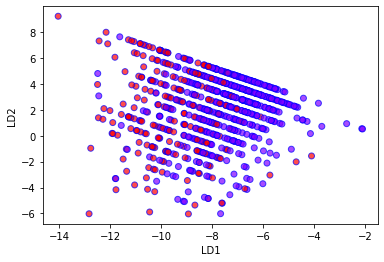

In [ ]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)